**# GROUP 3 DAY CLASS**
1. Hillary Ododa
2. Fatma Mohamed
3. Loryne Joy
4. Berril Ochieng
5. Naomi Jepkorir
6. Russel Wangila

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pranavraikokte_covid19_image_dataset_path = kagglehub.dataset_download('pranavraikokte/covid19-image-dataset')

print('Data source import complete.')


100%|██████████| 158M/158M [00:08<00:00, 19.1MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
print(pranavraikokte_covid19_image_dataset_path)


/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2


In [ ]:
# Loading the libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
# to load & preprocess the data

# ImageDataGenerator with rescaling & validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    os.path.join(pranavraikokte_covid19_image_dataset_path, "Covid19-dataset", "train"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    os.path.join(pranavraikokte_covid19_image_dataset_path, "Covid19-dataset", "train"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [ ]:
import os

# List the contents of the downloaded dataset directory
print(os.listdir(pranavraikokte_covid19_image_dataset_path))

['Covid19-dataset']


In [ ]:
# Build CNN (Functional API)
# Using Functional API instead of Sequential.

# Input layer
inputs = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

# Flatten + Dense
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer (categorical)
outputs = Dense(train_gen.num_classes, activation='softmax')(x)

# Build model
model = Model(inputs, outputs)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,819 (49.36 MB)

 Trainable params: 12,938,819 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Add Callbacks (EarlyStopping, ModelCheckpoint)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

callbacks = [early_stop, checkpoint]


In [ ]:
# Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.3654 - loss: 1.4440

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3813 - loss: 1.4276 - val_accuracy: 0.6600 - val_loss: 0.7768
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.7254 - loss: 0.7269

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 797ms/step - accuracy: 0.7311 - loss: 0.7128 - val_accuracy: 0.8800 - val_loss: 0.3220
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8542 - loss: 0.3511

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 909ms/step - accuracy: 0.8544 - loss: 0.3469 - val_accuracy: 0.9000 - val_loss: 0.2726
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.8919 - loss: 0.2501

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 766ms/step - accuracy: 0.8930 - loss: 0.2474 - val_accuracy: 0.9200 - val_loss: 0.2606
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9554 - loss: 0.1430

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 780ms/step - accuracy: 0.9560 - loss: 0.1411 - val_accuracy: 0.9200 - val_loss: 0.2498
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.9585 - loss: 0.0873

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 753ms/step - accuracy: 0.9600 - loss: 0.0866 - val_accuracy: 0.9400 - val_loss: 0.2490
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9893 - loss: 0.0319

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 770ms/step - accuracy: 0.9894 - loss: 0.0321 - val_accuracy: 0.9200 - val_loss: 0.2452
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 785ms/step - accuracy: 0.9774 - loss: 0.0463 - val_accuracy: 0.9200 - val_loss: 0.2609
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 702ms/step - accuracy: 0.9717 - loss: 0.0494 - val_accuracy: 0.9200 - val_loss: 0.3079
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 844ms/step - accuracy: 0.9980 - loss: 0.0147 - val_accuracy: 0.9200 - val_loss: 0.3984
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 777ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9200 - val_loss: 0.4365
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 791ms/step - accuracy: 0.9791 - loss: 0.0540 - val_accuracy: 0.9000 - val_loss: 0.5286


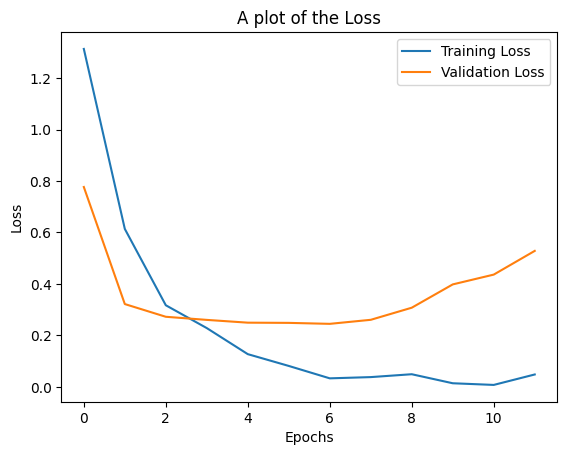

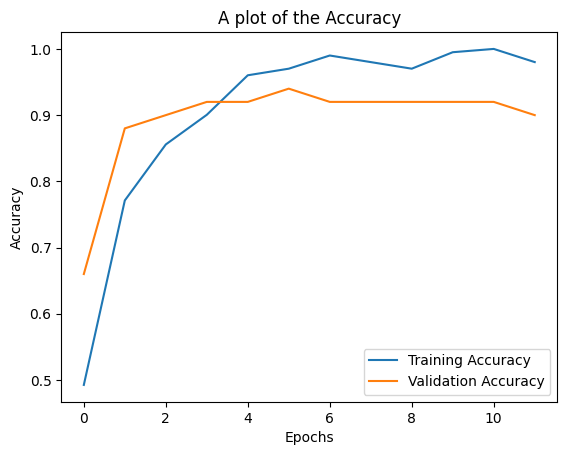

In [ ]:
# Visualize Loss & Accuracy


# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("A plot of the Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("A plot of the Accuracy")
plt.legend()
plt.show()
